In [176]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(corrplot)
library(ggthemes)
library(gridExtra)
library(hexbin)

## EDA

### 1. Describe your dataset

This dataset has the following features.

Date : Date of observation \
btcmarketprice : Average USD market price across major bitcoin exchanges \
btctotalbitcoins : The total number of bitcoins that have already been mined \
btcmarketcap : The total USD value of bitcoin supply in circulation \
btctradevolume : The total USD value of trading volume on major bitcoin exchanges \
btcblockssize : The total size of all block headers and transactions \
btcavgblock_size : The average block size in MB \
btcnorphaned_blocks : The total number of blocks mined but ultimately not attached to the main Bitcoin blockchain \
btcntransactionsperblock : The average number of transactions per block \
btcmedianconfirmation_time : The median time for a transaction to be accepted into a mined block \
btchashrate : The estimated number of tera hashes per second the Bitcoin network is performing \
btc_difficulty : A relative measure of how difficult it is to find a new block \
btcminersrevenue : Total value of coinbase block rewards and transaction fees paid to miners \
btctransactionfees : The total value of all transaction fees paid to miners \
btccostpertransactionpercent : miners revenue as percentage of the transaction volume \
btccostper_transaction : miners revenue divided by the number of transactions \
btcnunique_addresses : The total number of unique addresses used on the Bitcoin blockchain \
btcntransactions : The number of daily confirmed Bitcoin transactions \
btcntransactions_total : Total number of transactions \
btcntransactionsexcludingpopular : The total number of Bitcoin transactions, excluding the 100 most popular addresses \
btcntransactionsexcludingchainslongerthan_100 : The total number of Bitcoin transactions per day excluding long transaction chains \
btcoutputvolume : The total value of all transaction outputs per day \
btcestimatedtransaction_volume : The total estimated value of transactions on the Bitcoin blockchain \
btcestimatedtransactionvolumeusd : The estimated transaction value in USD value

### 2. Load the dataset

In [3]:
# Working directory
setwd("/Volumes/UBC/Block4/550/data-550-project2-group-11")

In [4]:
data_raw <- read.csv(file = 'bitcoin_dataset.csv')
head(data_raw)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,⋯,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2010-02-23 00:00:00,0,2110700,0,0,0,0.0002163347,0,1,0,⋯,25100.00000,0,252,252,42613,252,252,12600,50,0
2,2010-02-24 00:00:00,0,2120200,0,0,0,0.0002817211,0,1,0,⋯,179.24528,0,195,196,42809,196,196,14800,5300,0
3,2010-02-25 00:00:00,0,2127600,0,0,0,0.0002269054,0,1,0,⋯,1057.14286,0,150,150,42959,150,150,8100,700,0
4,2010-02-26 00:00:00,0,2136100,0,0,0,0.0003186765,0,1,0,⋯,64.58206,0,176,176,43135,176,176,29349,13162,0
5,2010-02-27 00:00:00,0,2144750,0,0,0,0.0002234162,0,1,0,⋯,1922.22222,0,176,176,43311,176,176,9101,450,0
6,2010-02-28 00:00:00,0,2152850,0,0,0,0.0002914506,0,1,0,⋯,154.28571,0,165,165,43476,165,165,13399,5250,0


### 3. Explore the data set

In [8]:
# library(tidyverse)
glimpse(data_raw)

Rows: 2,920
Columns: 24
$ Date                                                <chr> "2010-02-23 00:00…
$ btc_market_price                                    <dbl> 0, 0, 0, 0, 0, 0,…
$ btc_total_bitcoins                                  <dbl> 2110700, 2120200,…
$ btc_market_cap                                      <dbl> 0, 0, 0, 0, 0, 0,…
$ btc_trade_volume                                    <dbl> 0, 0, 0, 0, 0, 0,…
$ btc_blocks_size                                     <dbl> 0, 0, 0, 0, 0, 0,…
$ btc_avg_block_size                                  <dbl> 0.0002163347, 0.0…
$ btc_n_orphaned_blocks                               <dbl> 0, 0, 0, 0, 0, 0,…
$ btc_n_transactions_per_block                        <dbl> 1, 1, 1, 1, 1, 1,…
$ btc_median_confirmation_time                        <dbl> 0, 0, 0, 0, 0, 0,…
$ btc_hash_rate                                       <dbl> 3.153929e-05, 3.5…
$ btc_difficulty                                      <dbl> 2.527738, 3.78117…
$ btc_miners_revenue        

In [9]:
summary(data_raw)

     Date           btc_market_price    btc_total_bitcoins btc_market_cap     
 Length:2920        Min.   :    0.000   Min.   : 2110700   Min.   :0.000e+00  
 Class :character   1st Qu.:    6.769   1st Qu.: 8405100   1st Qu.:5.561e+07  
 Mode  :character   Median :  236.310   Median :12429100   Median :3.365e+09  
                    Mean   :  897.486   Mean   :11520514   Mean   :1.443e+10  
                    3rd Qu.:  603.909   3rd Qu.:15237638   3rd Qu.:8.210e+09  
                    Max.   :19498.683   Max.   :16876825   Max.   :3.265e+11  
                                                                              
 btc_trade_volume    btc_blocks_size    btc_avg_block_size 
 Min.   :0.000e+00   Min.   :     0.0   Min.   :0.0002163  
 1st Qu.:2.994e+05   1st Qu.:   777.2   1st Qu.:0.0245947  
 Median :1.024e+07   Median : 15132.0   Median :0.1998064  
 Mean   :8.231e+07   Mean   : 36058.4   Mean   :0.3557330  
 3rd Qu.:2.935e+07   3rd Qu.: 59301.8   3rd Qu.:0.6880359  
 Max.   

### 4. Initial thoughts

1. Almost clean data but we need to check for NA, may be present. IF NAs are present, we will assume this is because the server downtime and we will eliminate the NAs from the data
2. We may have outliers, however, given the data is about cryptocurrency, personally, we want the keep the outliers as it will help us getting better insights
3. We need Date in more clear format, possibly there is some pattern on particular dates or months
4. We also need to know how many months of data we have, for which we will perform some cleaning in the next steps to understand the dates better
5. We will also be checking for duplicates. Ideally, one date should have only one row entry only
6. We will also check for valid entries. Example: The median time for a transaction to be accepted into a mined block that is btc_median_confirmation_time should be more than 0

### 5. Wrangling

In [63]:
# Check for NAs
data_raw_na <- data_raw %>% filter_all(any_vars(is.na(.))) 
data_raw_na

Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,⋯,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2011-06-20 00:00:00,17.3500,6605900,114612365,NA,148,0.02004851,0,63,0.000000,⋯,1.388642,17.877669,23113,11278,804159,11278,8032,5015069.7,836861,14519535
2011-06-21 00:00:00,15.5000,6617450,102570475,NA,151,0.01643084,0,66,0.000000,⋯,10.123891,19.591783,19981,9152,813311,9152,7497,1307009.1,114264,1771098
2011-06-22 00:00:00,15.0500,6630950,99795798,NA,155,0.01631955,0,71,0.000000,⋯,11.033649,17.225305,24881,11810,825121,11810,7789,3232503.7,122507,1843731
2011-06-23 00:00:00,16.0000,6642850,106285600,NA,159,0.01766691,0,71,0.000000,⋯,2.503390,18.136986,22014,10512,835633,10512,7378,1682473.3,475995,7615913
2011-06-24 00:00:00,16.7501,6654850,111469403,NA,163,0.01769663,0,57,0.000000,⋯,11.319272,18.075485,22763,11134,846767,11134,7349,4528661.4,106146,1777963
2011-06-25 00:00:00,17.6000,6662400,117258240,NA,167,0.02679275,0,54,0.000000,⋯,6.853906,14.001219,19107,9517,856284,9517,6942,6997337.3,110463,1944141
2013-09-17 00:00:00,127.5600,11713200,1494135792,NA,10414,0.17492406,0,255,7.300000,⋯,3.273634,8.687958,61057,66291,23955832,42021,25426,672793.4,137920,17593089
2013-10-27 00:00:00,189.0600,11910050,2251714053,NA,11418,0.11872218,0,254,7.483333,⋯,4.148846,19.034630,54418,44388,26100239,30090,24573,505512.5,107717,20364921
2014-05-09 00:00:00,452.0200,12747700,5762215354,NA,17972,0.23220572,0,466,7.600000,⋯,5.185820,27.811787,140925,67693,38431328,61323,37223,1352519.6,80315,36304065


As we can see, we have NAs in our data. We will do null value treatment to remove NAs

In [161]:
# Remove NAs
data <- na.omit(data_raw) 
head(data)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,⋯,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2010-02-23 00:00:00,0,2110700,0,0,0,0.0002163347,0,1,0,⋯,25100.00000,0,252,252,42613,252,252,12600,50,0
2,2010-02-24 00:00:00,0,2120200,0,0,0,0.0002817211,0,1,0,⋯,179.24528,0,195,196,42809,196,196,14800,5300,0
3,2010-02-25 00:00:00,0,2127600,0,0,0,0.0002269054,0,1,0,⋯,1057.14286,0,150,150,42959,150,150,8100,700,0
4,2010-02-26 00:00:00,0,2136100,0,0,0,0.0003186765,0,1,0,⋯,64.58206,0,176,176,43135,176,176,29349,13162,0
5,2010-02-27 00:00:00,0,2144750,0,0,0,0.0002234162,0,1,0,⋯,1922.22222,0,176,176,43311,176,176,9101,450,0
6,2010-02-28 00:00:00,0,2152850,0,0,0,0.0002914506,0,1,0,⋯,154.28571,0,165,165,43476,165,165,13399,5250,0


Now, we will also convert Date in "date" format, it will be easier for us to extract month, day and year

In [162]:
# Fix the dates
library(lubridate)
data$Date <- ymd_hms(data$Date)
data$Month <- month(data$Date)
data$Year <- year(data$Date)
data$Day <- day(data$Date)
data$YYYYMM <-paste(year(data$Date),month(data$Date))
head(data)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,⋯,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Month,Year,Day,YYYYMM
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,2010-02-23,0,2110700,0,0,0,0.0002163347,0,1,0,⋯,42613,252,252,12600,50,0,2,2010,23,2010 2
2,2010-02-24,0,2120200,0,0,0,0.0002817211,0,1,0,⋯,42809,196,196,14800,5300,0,2,2010,24,2010 2
3,2010-02-25,0,2127600,0,0,0,0.0002269054,0,1,0,⋯,42959,150,150,8100,700,0,2,2010,25,2010 2
4,2010-02-26,0,2136100,0,0,0,0.0003186765,0,1,0,⋯,43135,176,176,29349,13162,0,2,2010,26,2010 2
5,2010-02-27,0,2144750,0,0,0,0.0002234162,0,1,0,⋯,43311,176,176,9101,450,0,2,2010,27,2010 2
6,2010-02-28,0,2152850,0,0,0,0.0002914506,0,1,0,⋯,43476,165,165,13399,5250,0,2,2010,28,2010 2


In [163]:
min(data$Date)

[1] "2010-02-23 UTC"

In [164]:
max(data$Date)

[1] "2018-02-20 UTC"

Now we know the following about the dates
1. We have data from Feb 23, 2010 to Feb 20, 2018

In [168]:
# Emilimate duplicates in data
data <- unique(data)

In [195]:
# The median time for a transaction to be accepted into a mined block should be more than 0
data <- subset(data, data$btc_median_confirmation_time>0)

In [196]:
glimpse(data)

Rows: 2,258
Columns: 28
$ Date                                                <dttm> 2011-12-02, 2011…
$ btc_market_price                                    <dbl> 3.13800, 3.12999,…
$ btc_total_bitcoins                                  <dbl> 7787350, 7794850,…
$ btc_market_cap                                      <dbl> 24436704, 2439780…
$ btc_trade_volume                                    <dbl> 181504.57, 363125…
$ btc_blocks_size                                     <dbl> 572, 574, 576, 57…
$ btc_avg_block_size                                  <dbl> 0.01741484, 0.016…
$ btc_n_orphaned_blocks                               <dbl> 0, 0, 0, 0, 0, 0,…
$ btc_n_transactions_per_block                        <dbl> 48, 37, 37, 36, 3…
$ btc_median_confirmation_time                        <dbl> 11.066667, 12.783…
$ btc_hash_rate                                       <dbl> 8.512504, 8.13296…
$ btc_difficulty                                      <dbl> 1090716, 1090716,…
$ btc_miners_revenue        

In [197]:
summary(data)

      Date                     btc_market_price   btc_total_bitcoins
 Min.   :2011-12-02 00:00:00   Min.   :    2.93   Min.   : 7787350  
 1st Qu.:2013-06-18 06:00:00   1st Qu.:  107.81   1st Qu.:11305656  
 Median :2015-01-16 12:00:00   Median :  381.46   Median :13732588  
 Mean   :2015-01-11 23:28:45   Mean   : 1156.94   Mean   :13359881  
 3rd Qu.:2016-08-04 18:00:00   3rd Qu.:  677.29   3rd Qu.:15797997  
 Max.   :2018-02-20 00:00:00   Max.   :19498.68   Max.   :16876825  
 btc_market_cap      btc_trade_volume    btc_blocks_size  btc_avg_block_size
 Min.   :2.288e+07   Min.   :3.638e+04   Min.   :   572   Min.   :0.01255   
 1st Qu.:1.220e+09   1st Qu.:3.828e+06   1st Qu.:  8477   1st Qu.:0.14521   
 Median :5.354e+09   Median :1.620e+07   Median : 28663   Median :0.35321   
 Mean   :1.862e+10   Mean   :1.056e+08   Mean   : 46450   Mean   :0.45587   
 3rd Qu.:1.017e+10   3rd Qu.:4.004e+07   3rd Qu.: 78011   3rd Qu.:0.79375   
 Max.   :3.265e+11   Max.   :5.352e+09   Max.   :157665

In [198]:
data1 <- data %>% 
group_by(YYYYMM, Year, Month) %>%
summarise(mean_btc_market_price = mean(btc_market_price), 
          mean_btc_total_bitcoins = mean(btc_total_bitcoins))


`summarise()` regrouping output by 'YYYYMM', 'Year' (override with `.groups` argument)



geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



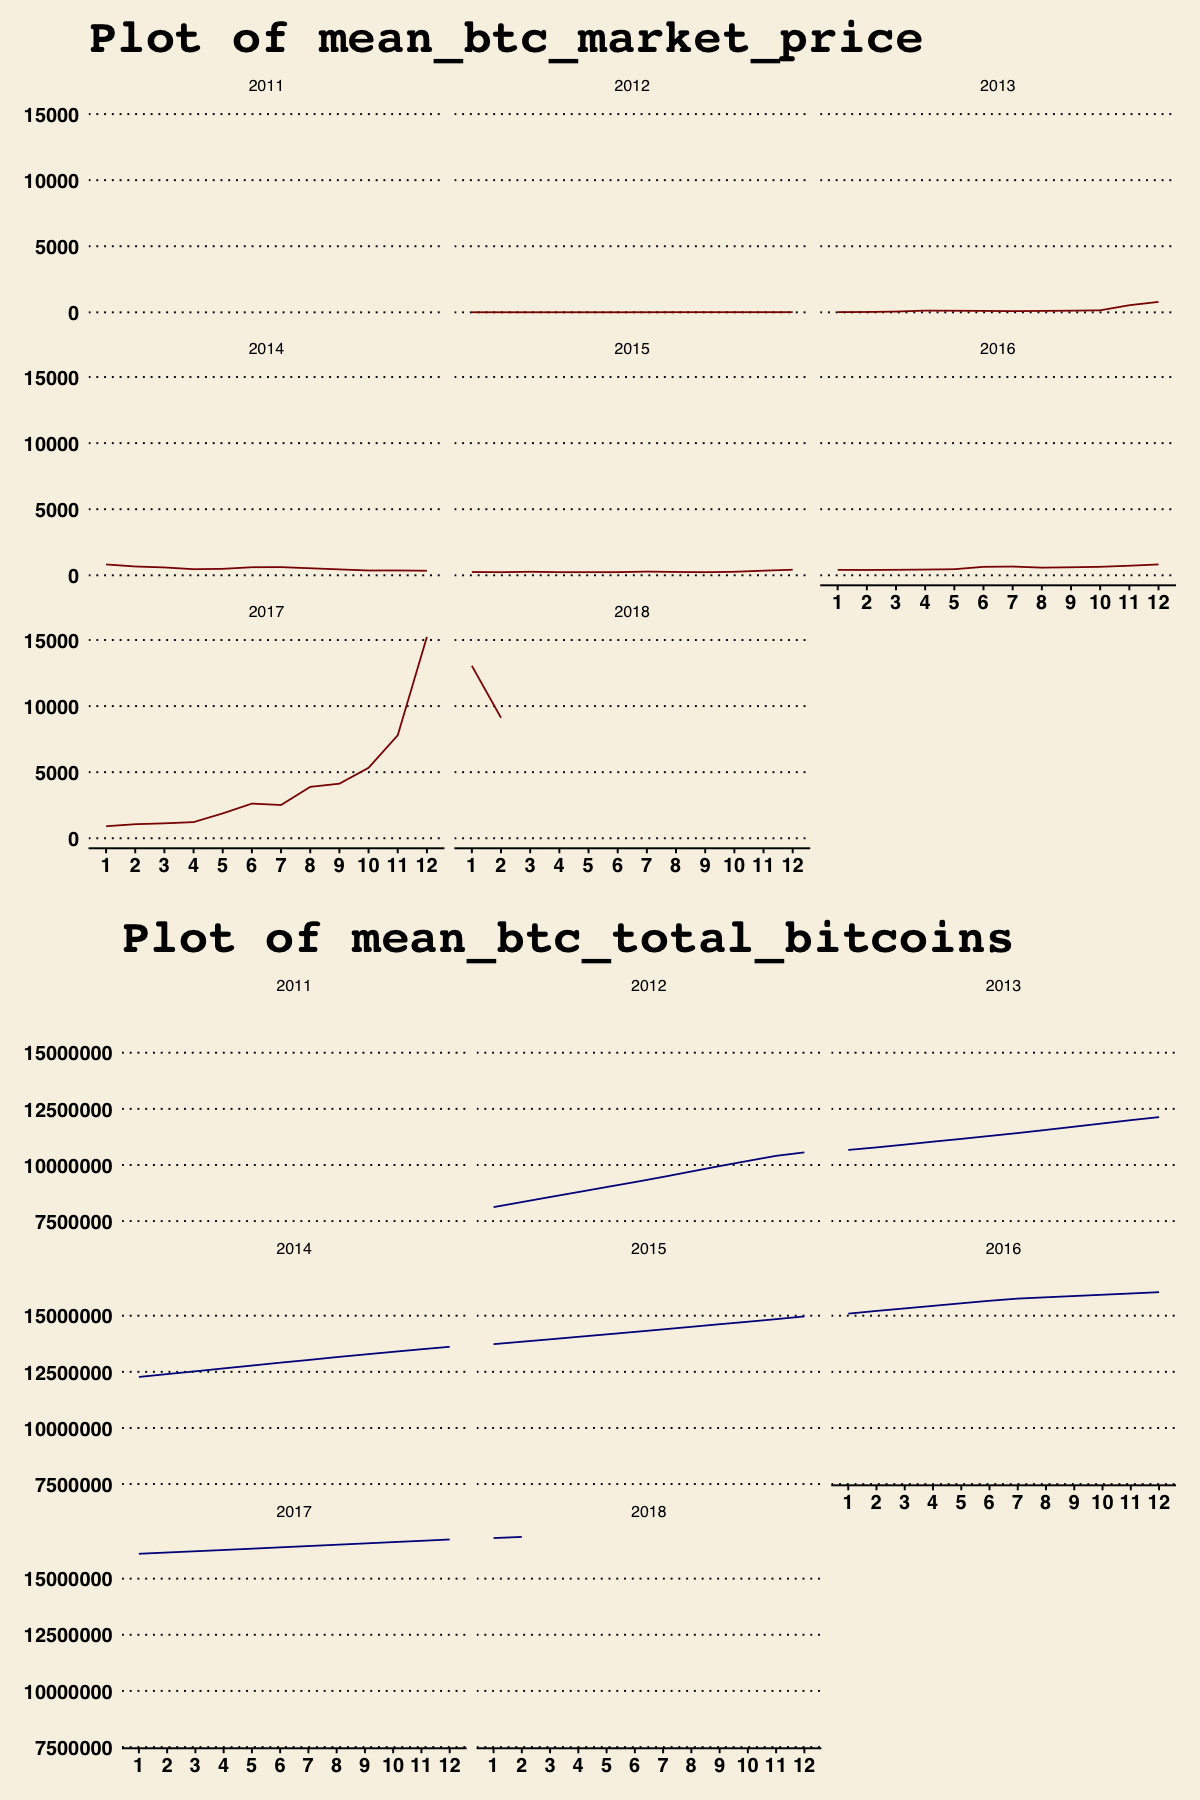

In [236]:
a <- ggplot(data1, aes(x=Month)) + 
  geom_line(aes(y = mean_btc_market_price), color = "darkred") + 
  facet_wrap(.~Year) + scale_x_discrete(name ="Months", limits=c("1","2","3","4","5","6","7","8","9","10","11","12")) +
    theme_wsj() + ggtitle("Plot of mean_btc_market_price")

b <- ggplot(data1, aes(x=Month)) + 
  geom_line(aes(y = mean_btc_total_bitcoins), color = "darkblue") + 
  facet_wrap(.~Year) + scale_x_discrete(name ="Months", limits=c("1","2","3","4","5","6","7","8","9","10","11","12")) +
    theme_wsj() + ggtitle("Plot of mean_btc_total_bitcoins")

options(repr.plot.width = 10, repr.plot.height = 15)

grid.arrange(a, b, ncol=1)


Over the years, we can see the mean of bitcoin prices rising, but 2017 shows a crazy increase. However there is a decrease in 2018.

We can also see the total bitcoins bought over years have also increased

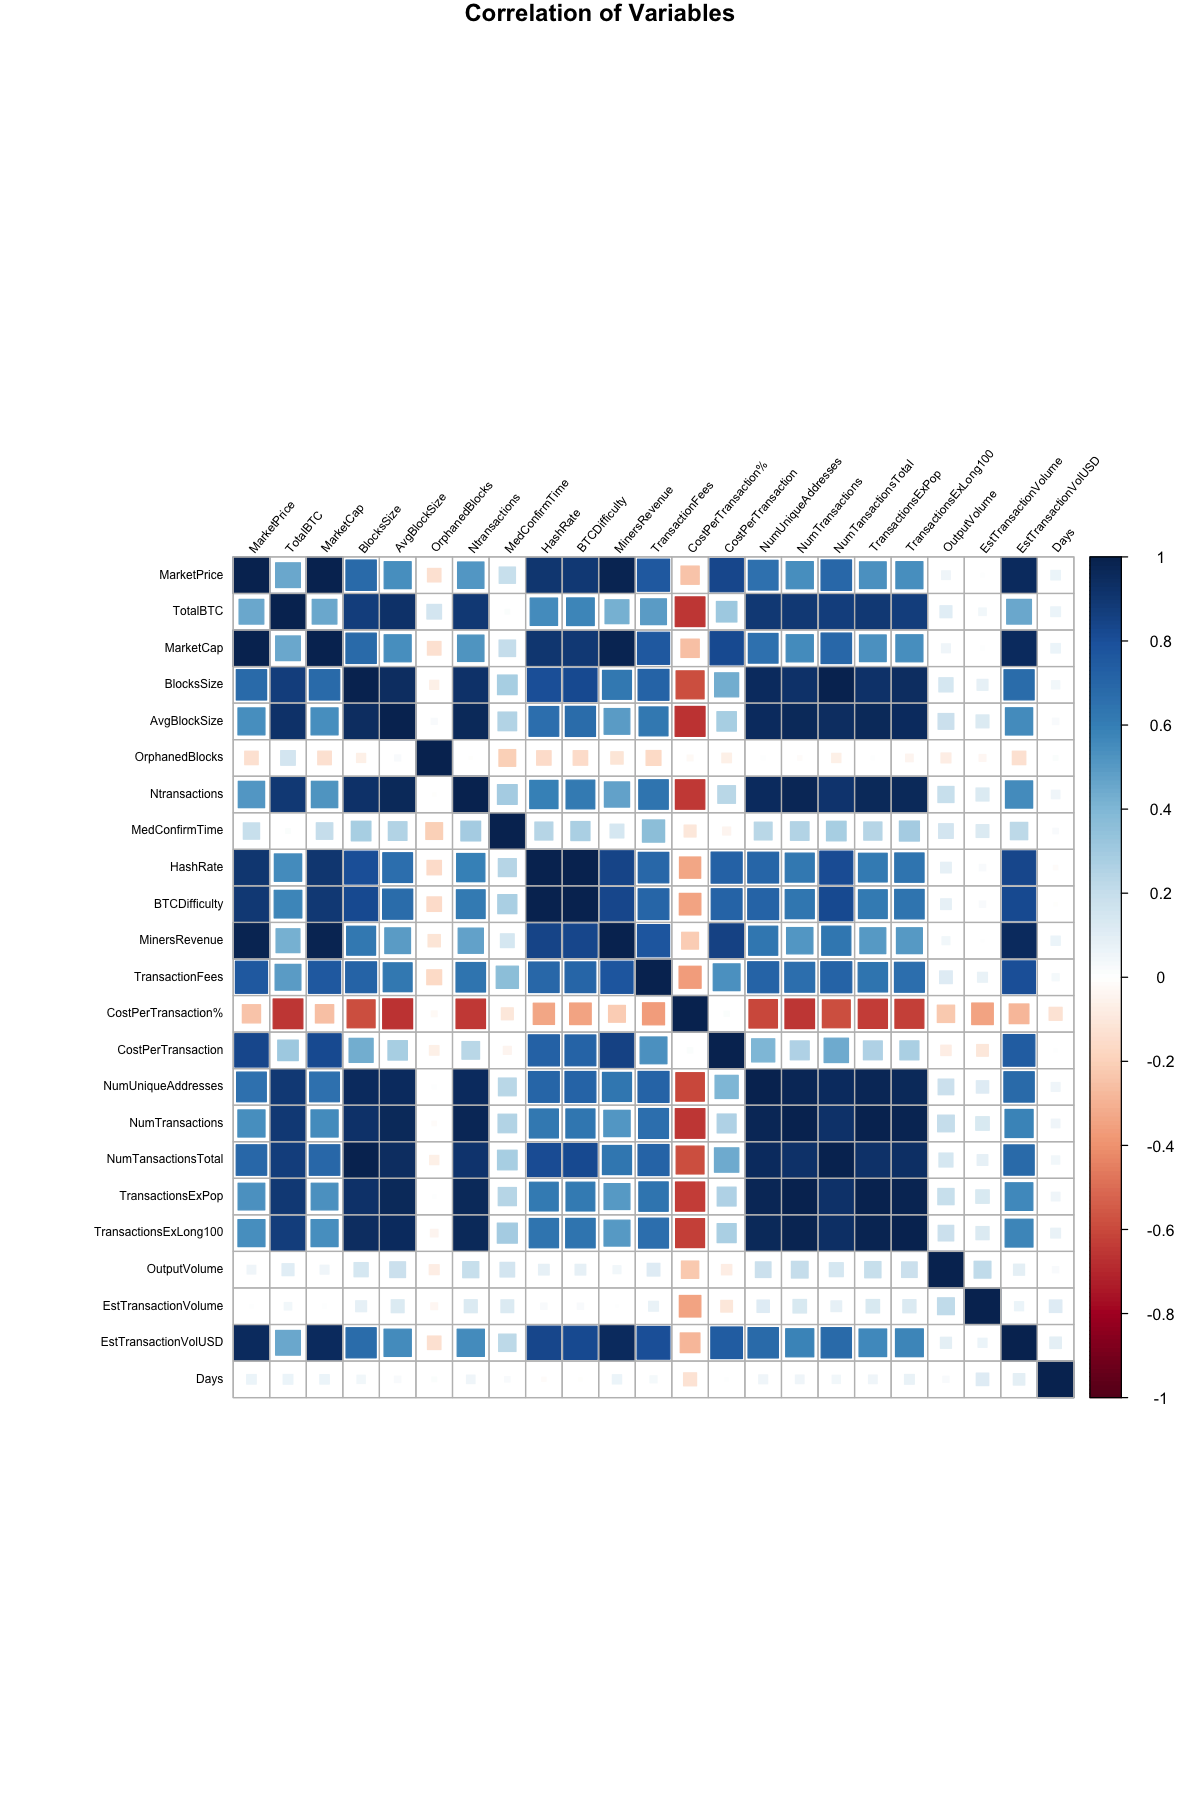

In [208]:
corr_df <- cor(data[,c(2:4,6:25)]) #selecting variables to include in correlation analysis

colnames(corr_df) <- c("MarketPrice", "TotalBTC", "MarketCap", "BlocksSize","AvgBlockSize","OrphanedBlocks", "Ntransactions","MedConfirmTime","HashRate","BTCDifficulty","MinersRevenue","TransactionFees","CostPerTransaction%","CostPerTransaction","NumUniqueAddresses","NumTransactions","NumTansactionsTotal","TransactionsExPop","TransactionsExLong100","OutputVolume","EstTransactionVolume","EstTransactionVolUSD","Days")
rownames(corr_df) <- c("MarketPrice", "TotalBTC", "MarketCap", "BlocksSize","AvgBlockSize","OrphanedBlocks", "Ntransactions","MedConfirmTime","HashRate","BTCDifficulty","MinersRevenue","TransactionFees",
"CostPerTransaction%","CostPerTransaction","NumUniqueAddresses","NumTransactions","NumTansactionsTotal","TransactionsExPop","TransactionsExLong100","OutputVolume","EstTransactionVolume","EstTransactionVolUSD","Days")
corrplot(corr_df, method = "square",  tl.srt = 50, tl.col = "black", tl.cex = 0.6, title = "Correlation of Variables", mar=c(0,0,1,0))

### 6 Research Questions (Part1)

##### Is there a correlation between the total USD value of bitcoin supply in circulation (btc_market_cap) and Average USD market price across major bitcoin exchanges (btc_market_price)?

### 7 Data analysis & visualization (Part1)

`geom_smooth()` using formula 'y ~ x'



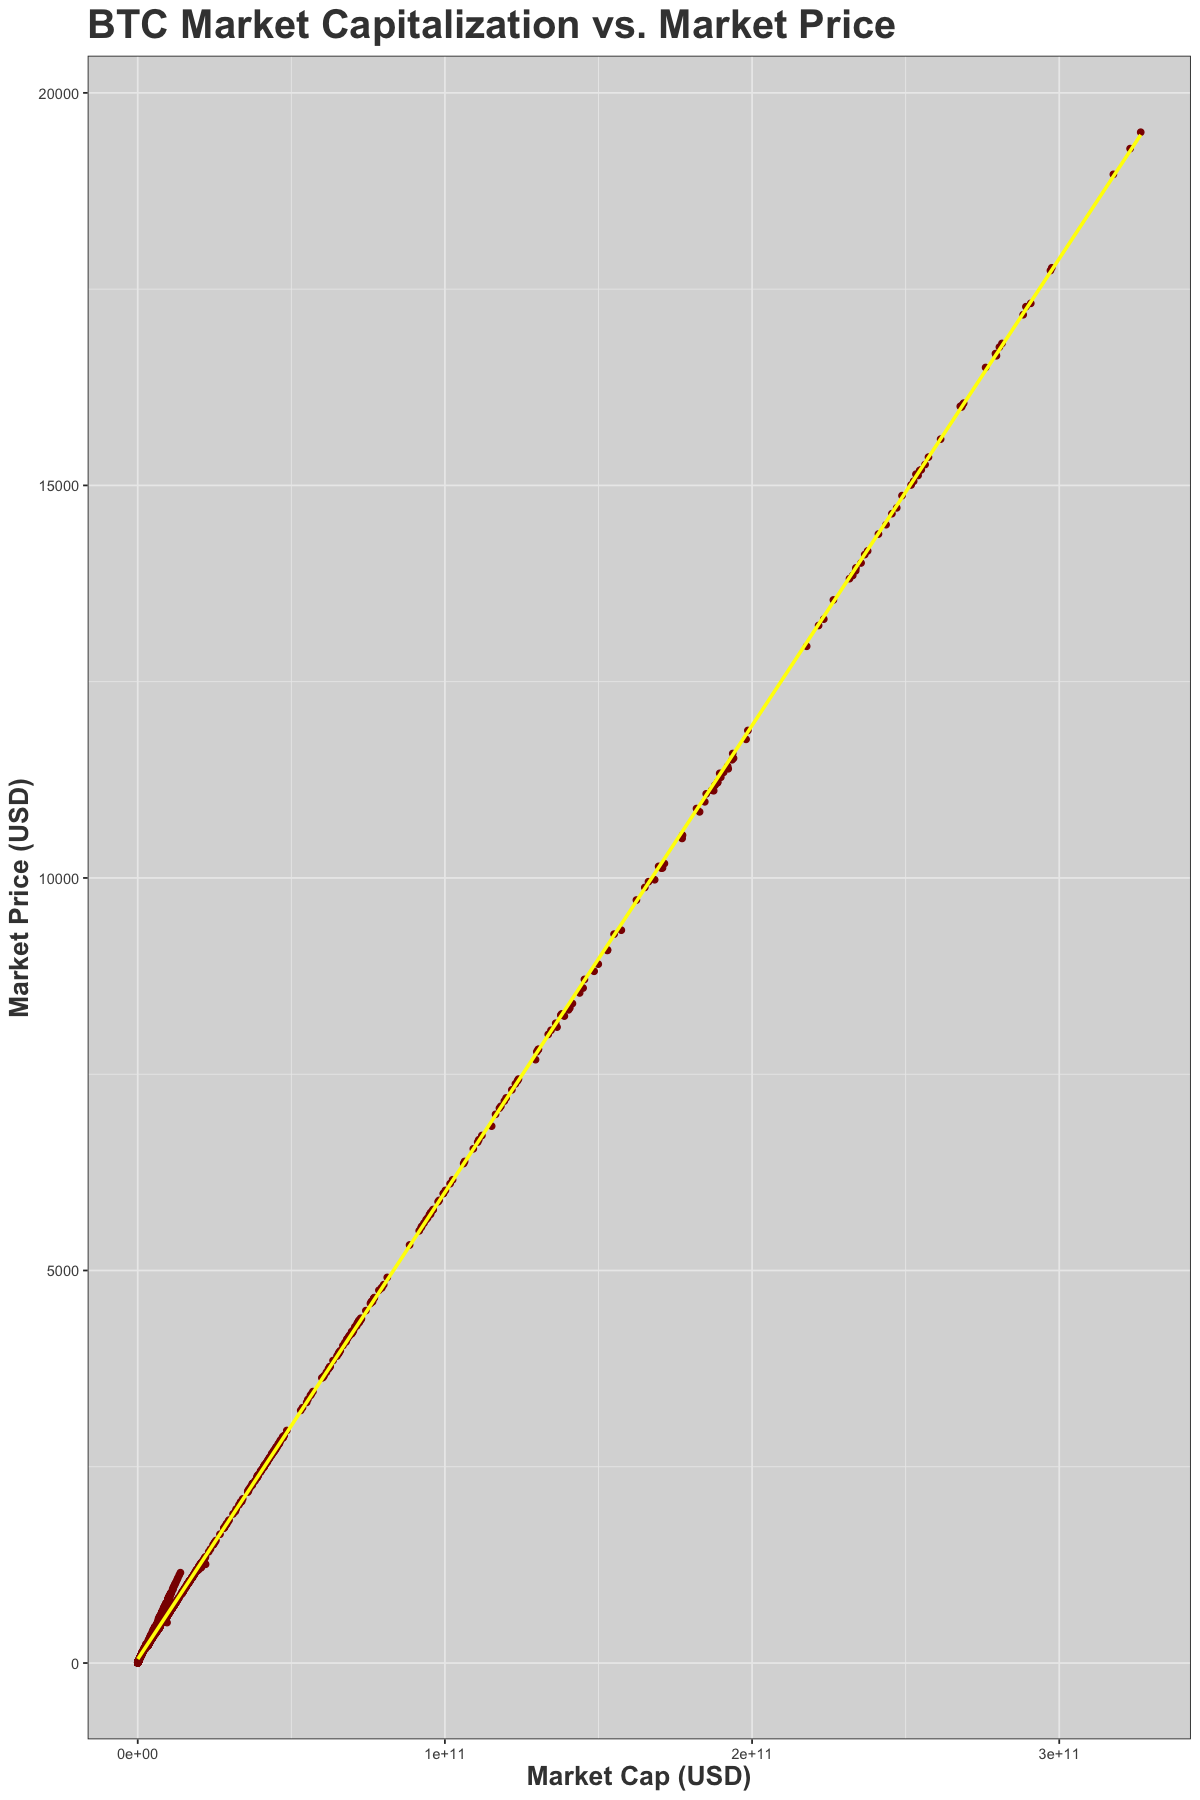

In [233]:
p <- ggplot(data = data, 
            aes(x = btc_market_cap, 
                y = btc_market_price)) + 
geom_point(color = 'darkred') +
geom_smooth(method = "lm", se = FALSE, color = 'yellow') + 
labs(x = "Market Cap (USD)", 
     y = "Market Price (USD)",
     title = "BTC Market Capitalization vs. Market Price") +
theme_bw() +
theme(
    plot.title = element_text(color = "gray25", size = 24, face="bold"),
    axis.title.x = element_text(color = "gray25", size = 16, face="bold"),
    axis.title.y = element_text(color = "gray25", size = 16, face="bold"),
    panel.background = element_rect(fill = 'grey85'))

p


This question should be answerable with this dataset but requires additional data processing or wrangling that is outside the scope of this mini-project.

### 6 Research Questions (Part2)

##### Is there a correlation between Total value of coinbase block rewards and transaction fees paid to miners (btc_miners_revenue) and Average USD market price across major bitcoin exchanges (btc_market_price)?

### 7 Data analysis & visualization (Part2)

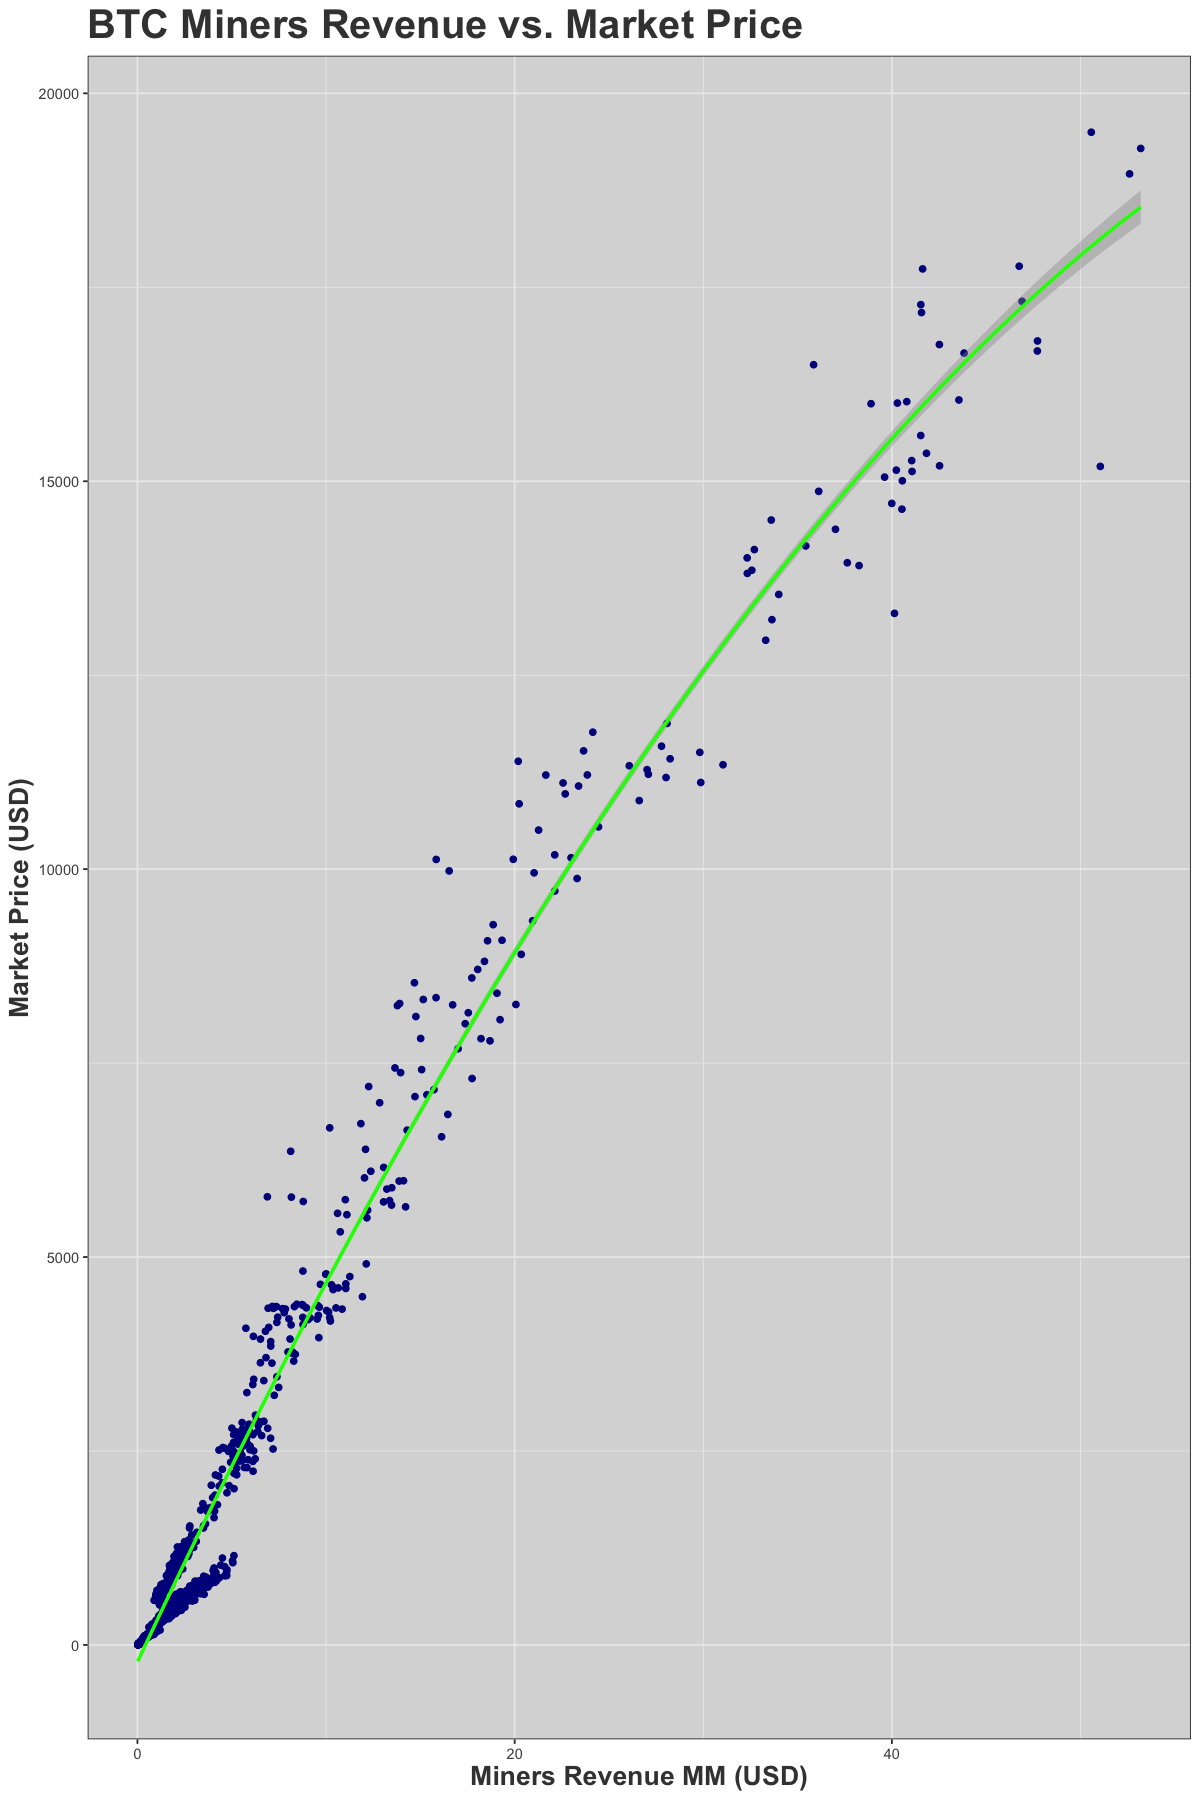

In [235]:
q <- ggplot(data = data, 
            aes(x = btc_miners_revenue/1000000, 
                y = btc_market_price)) + 
geom_point(color = 'darkblue') +
stat_smooth(method = "lm",  formula = y ~ poly(x,2), col = "green") +
labs(x = "Miners Revenue MM (USD)", 
     y = "Market Price (USD)",
     title = "BTC Miners Revenue vs. Market Price") +
theme_bw() +
theme(
    plot.title = element_text(color = "gray25", size = 24, face="bold"),
    axis.title.x = element_text(color = "gray25", size = 16, face="bold"),
    axis.title.y = element_text(color = "gray25", size = 16, face="bold"),
    panel.background = element_rect(fill = 'grey85'))

q


This question should be answerable with this dataset but requires additional data processing or wrangling that is outside the scope of this mini-project.

### 8 Summary and Conclusion

With the help of visualizations, we can gather the following research question. 

1 Is there a correlation between the total USD value of bitcoin supply in circulation (btc_market_cap) and Average USD market price across major bitcoin exchanges (btc_market_price)? 

2 Is there a correlation between Total value of coinbase block rewards and transaction fees paid to miners (btc_miners_revenue) and Average USD market price across major bitcoin exchanges (btc_market_price)? 

To confirm the answers, we can plot a summary and gather some information. However, given the data is of cryptocurrency and we are not the subject matter expert here, we need an expert opinion to check our wrangling and it is outside the scope of this mini-project 